In [40]:
import random
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import time

In [41]:
def generar_poblacion_suboptima(tamanio_poblacion, longitud_cromosoma):
    return [''.join(random.choice('01') for _ in range(int(longitud_cromosoma))) for _ in range(tamanio_poblacion)]

In [42]:
def sacar_longitud(c,m ):
    longitud = 0
    while c > 1 :
        if (c>=m):
            longitud += bits_ciudad
        else:
            longitud += bits_ciudad-1
        c -= 1
    return longitud
    

In [43]:
def ciudades_cercanas(ciudad):
    global tabla_costes_aux
    fila = tabla_costes_aux[ciudad]
    fila[ciudad] = 100000000
    
    minima_distancia = min(fila) 
    ciudad_cercana = np.argmin(fila)
    tabla_costes_aux[ciudad][ciudad_cercana] = 1000000000
    return int(ciudad_cercana)

In [44]:
def crear_tabla_distancias(ciudades):
    i = 0
    tabla = np.zeros((len(ciudades),len(ciudades)-1))
    for ciudad in ciudades:
        for j in range (0,len(ciudades)-1):
            ciudad_cercana = ciudades_cercanas(ciudad)
            tabla[i][j] = int(ciudad_cercana)
            j += 1
        i += 1
    return tabla

In [45]:
def decod_suboptima(num_ciudades,cromosoma,m,tabla_distancias,ciudades):
    c = num_ciudades-1
    recorrido = []
    posiciones = sacar_posiciones(num_ciudades,cromosoma,m)
    primera_ciudad = ciudades[0]
    #primera_ciudad =  ciudades[random.randint(0, num_ciudades-1)]
    recorrido.append(primera_ciudad)    
    fila = int(primera_ciudad)
    for i in range (0,len(posiciones)):
        columna = int(posiciones[i])
        siguiente_ciudad = int(tabla_distancias[fila][columna])
        while siguiente_ciudad in recorrido:
            columna += 1
            siguiente_ciudad = int(tabla_distancias[fila][columna])
        fila = int(siguiente_ciudad)           
        recorrido.append(siguiente_ciudad)
    #añadir la que falta
    for ciudad in ciudades:
        if not ciudad in recorrido:
            recorrido.append(ciudad)
    return recorrido

In [46]:
def sacar_posiciones(num_ciudades,cromosoma,m):
    posiciones = []
    bits_ciudad = int(np.log2(m))
    contador_ciudades = num_ciudades
    i = 0
    while contador_ciudades > m :
        bits = ""
        for j in range (i,i+(bits_ciudad)):
            bits += ((cromosoma[j]))  
            i += 1
        posiciones.append(int(bits,2))        
        contador_ciudades -= 1
    while contador_ciudades > 2:
        posiciones.append(int(cromosoma[i],2))
        i += 1
        contador_ciudades -= 1
    return posiciones

In [47]:
def calcular_distancia_total(individuo):
    # Aquí implementa el cálculo de la distancia total basado en el vector S
        ciudad_actual = individuo[0]  # Obtén la primera ciudad
        distancia_total = 0
    
        for i in range(1, len(tabla_costes)):
            siguiente_ciudad = individuo[i]

            distancia_total += tabla_costes[ciudad_actual][siguiente_ciudad]
            ciudad_actual = siguiente_ciudad

        # Regresa a la ciudad de inicio
        distancia_total += tabla_costes[ciudad_actual][individuo[0]]

        return distancia_total

In [48]:
def seleccionar_individuo_ruleta(poblacion, aptitudes):
    total_aptitud = sum(aptitudes)
    probabilidad = [aptitud / total_aptitud for aptitud in aptitudes]
    return random.choices(poblacion, probabilidad)[0]

In [49]:
def seleccionar_individuo_torneo(poblacion, aptitudes):
    k=5
    population_size = len(poblacion)
    tournament = random.sample(range(population_size), k)  # Selecciona 'k' individuos al azar para el torneo
    winner = min(tournament, key=lambda i: aptitudes[i])  # Elige al individuo con la menor aptitud en el torneo
    winner = poblacion[winner]
    return winner

In [50]:
def mutar_individuo(individuo, num_generaciones):
    probabilidad_mutacion = 0.6
    if num_generaciones > 1000:
        probabilidad_mutacion = probabilidad_mutacion/2
    if num_generaciones > 2000:
        probabilidad_mutacion = probabilidad_mutacion/4
    if num_generaciones > 4000:
        probabilidad_mutacion = probabilidad_mutacion/8
    if num_generaciones > 8000:
        probabilidad_mutacion = probabilidad_mutacion/10    
    if num_generaciones > 15000:
        probabilidad_mutacion = probabilidad_mutacion/20
                   
    mutado = list(individuo)
    for i in range(len(individuo)):
        if random.random() < probabilidad_mutacion:
            # Cambia el bit si la probabilidad de mutación se cumple
            mutado[i] = '0' if individuo[i] == '1' else '1'
    return ''.join(mutado)

In [51]:
def find_best_individual(population, fitness_values):
    # Encontrar y registrar al mejor individuo en la población.
    best_index = fitness_values.index(min(fitness_values))
    best_individual = population[best_index]

    return best_individual

def replace_worst_with_best(population, fitness_values, best_individual):
    # Encontrar el peor individuo y sustituirlo por el mejor individuo si es superior.
    worst_index = fitness_values.index(min(fitness_values))
    if evaluar_aptitud(best_individual) > fitness_values[worst_index]:
        population[worst_index] = best_individual

def cruzamiento_un_punto(padre1, padre2, longitud_cromosoma):
    medio = int(longitud_cromosoma/2)
    punto_cruzamiento = random.randint(1, longitud_cromosoma-1)  # Se elige un punto de cruzamiento aleatorio (excepto el primer y último bit)
   
    hijo1 = padre1[:punto_cruzamiento] + padre2[punto_cruzamiento:]
    hijo2 = padre2[:punto_cruzamiento] + padre1[punto_cruzamiento:]

    return hijo1, hijo2

Generación 0: Mejor individuo - 00110101101000100011001001100011001011111010100010000101010010011010101000101111010111110000110101011101110000110100110010110100110010100001111011011100001101101000100100010101010110010010101001110110010011101100111111000010000011011001001010110000010111000010011011011110001101011101101011011110011101111001111100100111100100001100111001000001110000011101010110011111011000111101001111011101101000111101001111111010000101000110010001001110101010001001101111000011001100100111100010110010110110011111111110001001011101101001001010011101101001001101101101110101111000010101110011001000011100100001011000100101101000111000001000010001000100000111111000111000001110001110101000011111101000110110100011010011111001110000000110100111000101100100101000110010011110110101010000010110011010000001100111111111000010010010100001110110110111010010100110011110110010101011001100111100111110101100001101000101100101011011111101011000100000110111100101110000110111100100111011100100

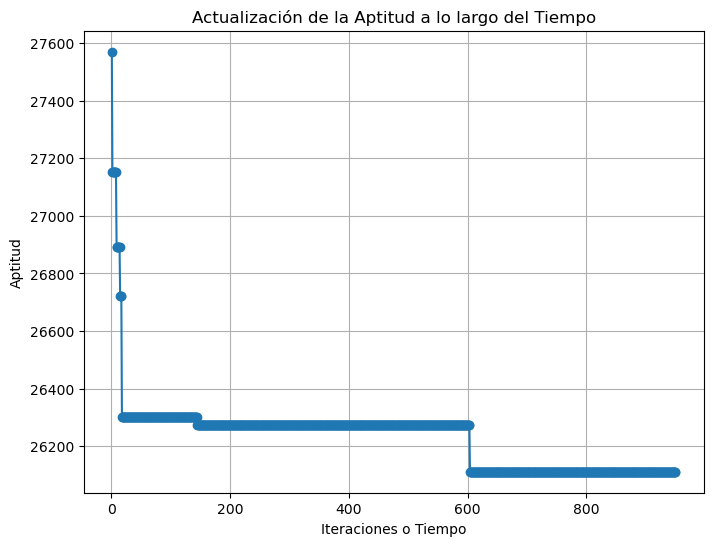

In [52]:
tabla_costes = np.load('tsp.lg.npy') 
tabla_costes_aux = tabla_costes.copy()

num_ciudades = len(tabla_costes)
tamanio_poblacion = 100
c = num_ciudades-1
ciudades = list(range(0,num_ciudades))
m = 4
bits_ciudad = np.log2(m)
aptitudgraph = []
longitud_cromosoma = sacar_longitud(c,m)    
tabla_distancias = crear_tabla_distancias(ciudades)
poblacion = generar_poblacion_suboptima(tamanio_poblacion,longitud_cromosoma)
indx = 0
num_generaciones = 0
tiempo_limite = 3600
tiempo_inicio = time.time()
while indx < 1:
    # Evaluación de aptitud
    
    aptitudes = [calcular_distancia_total(decod_suboptima(num_ciudades,cromosoma,m,tabla_distancias,ciudades)) for cromosoma in poblacion]
    mejor_individuo = find_best_individual(poblacion, aptitudes)
    # Selección
    nueva_poblacion = []
    

    for _ in range(tamanio_poblacion // 2):
        padre1 = seleccionar_individuo_torneo(poblacion, aptitudes)
        padre2 = seleccionar_individuo_torneo(poblacion, aptitudes)

        hijo1, hijo2 = cruzamiento_un_punto(padre1, padre2,longitud_cromosoma)
        nueva_poblacion.extend([hijo1, hijo2])

    #for _ in range(tamano_poblacion // 2):
        #selected_parents = tournament_selection(poblacion, aptitudes)
        #hijo1, hijo2 = cruzamiento_un_punto(selected_parents[0], selected_parents[1])
        #nueva_poblacion.extend([hijo1, hijo2])
    # Mutación
    nueva_poblacion = [mutar_individuo(individuo,num_generaciones) for individuo in nueva_poblacion]

    # Reemplazar la población anterior con la nueva población
    poblacion = nueva_poblacion
    
    poblacion[aptitudes.index(max(aptitudes))] = mejor_individuo
    #replace_worst_with_best(poblacion, aptitudes, mejor_individuo)

    # Mostrar la aptitud del mejor individuo en esta generación
    aptitudes = [calcular_distancia_total(decod_suboptima(num_ciudades,cromosoma,m,tabla_distancias,ciudades)) for cromosoma in poblacion]
    
    mejor_individuo_generacion = poblacion[aptitudes.index(min(aptitudes))]
    mejor_aptitud_generacion = min(aptitudes)
    if(num_generaciones % 1 == 0): # Every 1 epochs


        print(f"Generación {num_generaciones}: Mejor individuo - {mejor_individuo_generacion}, Aptitud: {mejor_aptitud_generacion}")
    
    aptitudgraph.append(mejor_aptitud_generacion)
    num_generaciones += 1
    tiempo_transcurrido = time.time() - tiempo_inicio
    if tiempo_transcurrido >= tiempo_limite: indx += 1
print(f"mejor solucion Aptitud: {mejor_aptitud_generacion}")
iteraciones = list(range(1, len(aptitudgraph) + 1))

# Crea la gráfica de línea
plt.figure(figsize=(8, 6))
plt.plot(iteraciones, aptitudgraph, marker='o', linestyle='-')
plt.title('Actualización de la Aptitud a lo largo del Tiempo')
plt.xlabel('Iteraciones o Tiempo')
plt.ylabel('Aptitud')
plt.grid(True)

# Muestra la gráfica
plt.show()